In [1]:
from pathlib import Path
import torchvision as tv
from torchvision import transforms
from torchvision.transforms.functional import to_pil_image, to_tensor
from torch.nn import Sequential
from torch.utils.data import DataLoader
import pytorch_lightning as pl

from kornia import augmentation as T

/home/thanadolps/anaconda3/envs/torchy/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
show = to_pil_image

In [3]:
from amoug import AmougRCNNModel, AmougDataset, collate_fn, visualize

In [4]:
augmentation = Sequential(
    T.ColorJitter(brightness=0.5, hue=0.5, contrast=0.5),
    T.RandomElasticTransform(),
    T.RandomGaussianBlur(kernel_size=(9, 9), sigma=(0.1, 2.0)),
    T.RandomGrayscale(p=0.1),
    T.RandomSolarize(),
    T.RandomInvert(p=0.1),
)

In [5]:
ds = AmougDataset("test_data", transform=to_tensor)
data = DataLoader(ds, batch_size=4, num_workers=12, collate_fn=collate_fn)

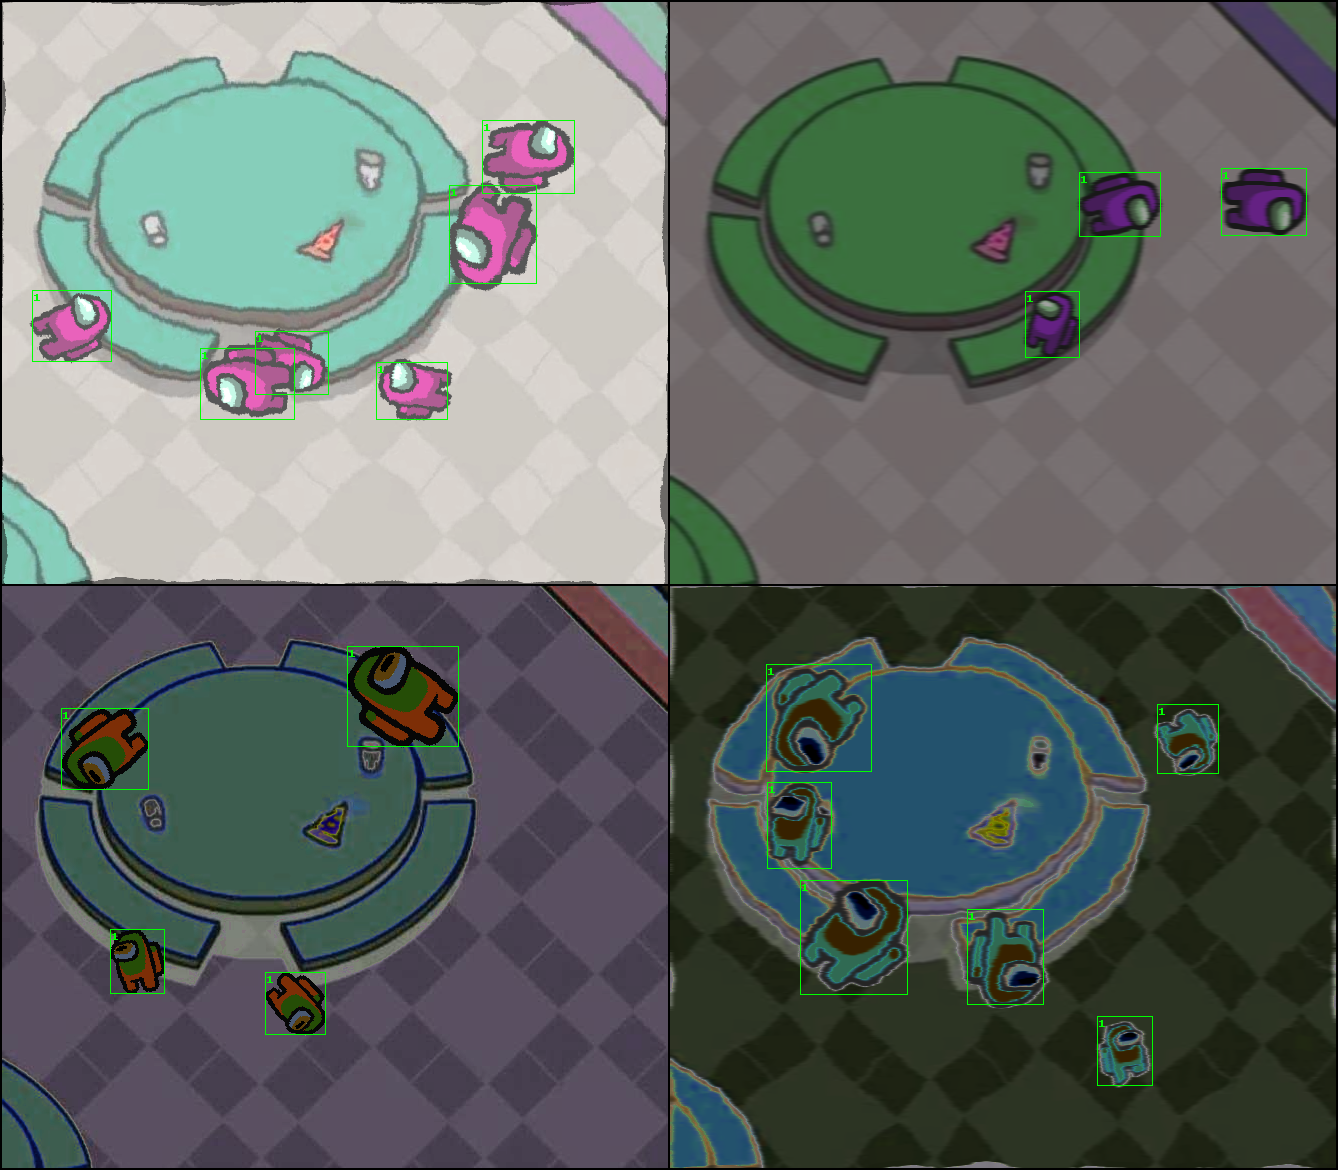

In [6]:
imgs, targets = next(iter(data))


show(visualize(augmentation(imgs), targets))

In [7]:
trainer = pl.Trainer(accelerator="auto")

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [8]:
model_paths = [path for path in Path("models/FastRCNN").iterdir()]

In [9]:
for model_path in model_paths:
    print(f"MODEL={model_path}")
    model = AmougRCNNModel.load_from_checkpoint(
        model_path, 
        augmentation=augmentation,
        augment_non_train=True
    )
    model.freeze()
    print(trainer.validate(model, dataloaders=data))
    print(trainer.test(model, data))

MODEL=models/FastRCNN/FR-v2-d1000.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0:   1%|▏         | 1/75 [00:00<01:06,  1.11it/s]

/home/thanadolps/anaconda3/envs/torchy/lib/python3.7/site-packages/pytorch_lightning/utilities/data.py:86: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 4. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  "Trying to infer the `batch_size` from an ambiguous collection. The batch size we"


Validation DataLoader 0: 100%|██████████| 75/75 [01:05<00:00,  1.14it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.18109650909900665
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
[{'val_loss': 0.18109650909900665}]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing DataLoader 0: 100%|██████████| 75/75 [01:39<00:00,  1.33s/it]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric               DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       test_map:map           0.7950849533081055
     test_map:map_50          0.9323203563690186
     test_map:map_75          0.9195913672447205
    test_map:map_large        0.8258342742919922
   test_map:map_medium        0.7745470404624939
  test_map:map_per_class             -1.0
    test_map:map_small       -0.9493333101272583
      test_map:mar_1         0.18888729810714722
     test_map:mar_10          0.8244690895080566
     test_map:mar_100         0.8244690895080566
test_map:mar_100_per_class           -1.0
    test_map:mar_large        0.8688700199127197
   test_map:mar_medium        0.8079978227615356
    test_map:mar_sm

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 75/75 [01:06<00:00,  1.12it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.2540068030357361
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[{'val_loss': 0.2540068030357361}]
Testing DataLoader 0: 100%|██████████| 75/75 [01:47<00:00,  1.43s/it]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric               DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       test_map:map           0.7188668251037598
     test_map:map_50          0.9067790508270264
     test_map:map_75          0.8436581492424011
    test_map:map_large        0.6833600997924805
   test_map:map_medium        0.7068825364112854
  test_map:map_per_class             -1.0
    test_map:map_small       -0.9543635845184326
      test_map:mar_1         0.18086758255958557
     test_map:mar_10          0.7605339884757996
     test_map:mar_100         0.7649869918823242
test_map:mar_100_per_class           -1.0
    test_map:mar_large        0.7641782164573669
   test_map:mar_medium        0.7

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 75/75 [01:06<00:00,  1.13it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.20391303300857544
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[{'val_loss': 0.20391303300857544}]
Testing DataLoader 0: 100%|██████████| 75/75 [01:39<00:00,  1.33s/it]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric               DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       test_map:map           0.7886816263198853
     test_map:map_50          0.9311808347702026
     test_map:map_75          0.9144996404647827
    test_map:map_large        0.7835685610771179
   test_map:map_medium        0.7712700366973877
  test_map:map_per_class             -1.0
    test_map:map_small       -0.9440000653266907
      test_map:mar_1         0.19141988456249237
     test_map:mar_10          0.8196329474449158
     test_map:mar_100         0.8202518820762634
test_map:mar_100_per_class           -1.0
    test_map:mar_large        0.8436112403869629
   test_map:mar_medium        0.

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Validation DataLoader 0: 100%|██████████| 75/75 [01:06<00:00,  1.12it/s]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     Validate metric           DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        val_loss            0.26451313495635986
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


[{'val_loss': 0.26451313495635986}]
Testing DataLoader 0: 100%|██████████| 75/75 [01:48<00:00,  1.45s/it]
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric               DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       test_map:map           0.7097311615943909
     test_map:map_50          0.9090832471847534
     test_map:map_75          0.8369334936141968
    test_map:map_large        0.656304121017456
   test_map:map_medium        0.7104328870773315
  test_map:map_per_class             -1.0
    test_map:map_small       -0.9546666741371155
      test_map:mar_1          0.179948091506958
     test_map:mar_10          0.7600997686386108
     test_map:mar_100         0.7667697668075562
test_map:mar_100_per_class           -1.0
    test_map:mar_large        0.7662011981010437
   test_map:mar_medium        0.76